# Import Module

In [245]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import os

# Load the data

In [246]:
import os

folder_path = r"D:\Code\py_code\Text-Processing\data\twitter_data"
file_names = os.listdir(folder_path)

print(file_names)

['pajak-1.csv', 'pajak-aufa.csv', 'pajak-evi1.csv', 'pajak-evi2.csv', 'pajak.csv']


In [247]:
def load_data(folder_path, file_name):
    data = pd.read_csv(os.path.join(folder_path, file_name))
    return data

In [248]:
data1 = load_data(folder_path, file_names[0])
data2 = load_data(folder_path, file_names[1])
data3 = load_data(folder_path, file_names[2])
data4 = load_data(folder_path, file_names[3])
data5 = load_data(folder_path, file_names[4])

data = pd.concat([data1, data2, data3, data4, data5], axis=0)
data.shape

(2258, 15)

# Preprocessing

In [249]:
data.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1786040009260445713,Thu May 02 14:28:15 +0000 2024,3263,aku ga pernah punya pengalaman serupa tapi be...,1786040009260445713,https://pbs.twimg.com/media/GMlJ685aAAASA6n.jpg,NaN,in,NaN,300,109,212,https://twitter.com/convomfs/status/1786040009...,1284061445148209154,convomfs
1,1786085322604044347,Thu May 02 17:28:19 +0000 2024,2612,Wujud Revolusi Mental: - Yang dihajar yang min...,1786085322604044347,NaN,NaN,in,"Depok, Indonesia",11,18,1462,https://twitter.com/andikamalreza/status/17860...,499262326,andikamalreza
2,1786182532943479201,Thu May 02 23:54:36 +0000 2024,83,Lagi viral ! Pengusaha empek-empek di Palemban...,1786182532943479201,https://pbs.twimg.com/ext_tw_video_thumb/17861...,NaN,in,"Ponorogo, Indonesia",8,14,41,https://twitter.com/Naandaa27/status/178618253...,1259753320152887296,Naandaa27
3,1785628643139698992,Wed May 01 11:13:38 +0000 2024,3985,Tolak Bayar Pajak Pasangan Ini Pilih Robek Tas...,1785628643139698992,https://pbs.twimg.com/media/GMfTyHyb0AAPHIF.jpg,NaN,in,NaN,49,297,567,https://twitter.com/Artic_monkey12/status/1785...,1388483598,Artic_monkey12
4,1785206063916310954,Tue Apr 30 07:14:27 +0000 2024,771,Hukum bekerja dikantor pajak dan bea cukai htt...,1785206063916310954,https://pbs.twimg.com/ext_tw_video_thumb/17852...,NaN,in,Indonesia,48,95,271,https://twitter.com/fotodakwah/status/17852060...,105428309,fotodakwah


In [250]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2258 entries, 0 to 593
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   conversation_id_str      2258 non-null   int64 
 1   created_at               2258 non-null   object
 2   favorite_count           2258 non-null   int64 
 3   full_text                2258 non-null   object
 4   id_str                   2258 non-null   int64 
 5   image_url                857 non-null    object
 6   in_reply_to_screen_name  461 non-null    object
 7   lang                     2258 non-null   object
 8   location                 1532 non-null   object
 9   quote_count              2258 non-null   int64 
 10  reply_count              2258 non-null   int64 
 11  retweet_count            2258 non-null   int64 
 12  tweet_url                2258 non-null   object
 13  user_id_str              2258 non-null   int64 
 14  username                 2258 non-null   objec

In [251]:
data.describe()

,conversation_id_str,favorite_count,id_str,quote_count,reply_count,retweet_count,user_id_str
count,2.258000e+03,2258.000000,2.258000e+03,2258.000000,2258.000000,2258.000000,2.258000e+03
mean,1.770030e+18,2066.302480,1.770052e+18,71.310895,74.966342,573.108503,6.704591e+17
std,8.328196e+16,6444.182483,8.328505e+16,377.751347,271.080100,1841.943679,6.974322e+17
min,2.498896e+17,0.000000,2.498896e+17,0.000000,0.000000,0.000000,7.442530e+05
25%,1.782678e+18,9.000000,1.782691e+18,0.000000,1.000000,2.000000,1.980271e+08
50%,1.783815e+18,46.000000,1.783820e+18,1.000000,4.000000,12.000000,7.126836e+17
75%,1.784605e+18,444.000000,1.784608e+18,8.000000,20.000000,98.000000,1.368347e+18
max,1.786253e+18,64155.000000,1.786253e+18,9325.000000,3072.000000,32782.000000,1.775367e+18


In [252]:
data.isna().sum()

conversation_id_str           0
created_at                    0
favorite_count                0
full_text                     0
id_str                        0
image_url                  1401
in_reply_to_screen_name    1797
lang                          0
location                    726
quote_count                   0
reply_count                   0
retweet_count                 0
tweet_url                     0
user_id_str                   0
username                      0
dtype: int64

## Drop unwanted columns

In [253]:
data = data[['id_str', 'full_text']]
data.head()

,id_str,full_text
0,1786040009260445713,aku ga pernah punya pengalaman serupa tapi be...
1,1786085322604044347,Wujud Revolusi Mental: - Yang dihajar yang min...
2,1786182532943479201,Lagi viral ! Pengusaha empek-empek di Palemban...
3,1785628643139698992,Tolak Bayar Pajak Pasangan Ini Pilih Robek Tas...
4,1785206063916310954,Hukum bekerja dikantor pajak dan bea cukai htt...


## Drop missing values & duplicate data

In [254]:
data.isna().sum()

id_str       0
full_text    0
dtype: int64

In [255]:
data.drop_duplicates(inplace=True)
data.shape

(1177, 2)

In [256]:
data.to_csv(r'D:\Code\py_code\Text-Processing\data\labelled\clean-column.csv', index=False)
data.to_excel(r'D:\Code\py_code\Text-Processing\data\labelled\clean-column.xlsx', index=False)


In [257]:
labelled_data = pd.read_excel(r'D:\Code\py_code\Text-Processing\data\labelled\labelled_data.xlsx')
labelled_data.head()

,id_str,full_text,label
0,1,aku ga pernah punya pengalaman serupa tapi be...,0
1,2,Wujud Revolusi Mental: - Yang dihajar yang min...,0
2,3,Lagi viral ! Pengusaha empek-empek di Palemban...,2
3,4,Tolak Bayar Pajak Pasangan Ini Pilih Robek Tas...,0
4,5,Hukum bekerja dikantor pajak dan bea cukai htt...,2


# Text Preprocessing

In [258]:
import string 
import re

from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

### Case Folding (Lowercase)

In [259]:
labelled_data['full_text'] = labelled_data['full_text'].str.lower()
labelled_data.head()

,id_str,full_text,label
0,1,aku ga pernah punya pengalaman serupa tapi be...,0
1,2,wujud revolusi mental: - yang dihajar yang min...,0
2,3,lagi viral ! pengusaha empek-empek di palemban...,2
3,4,tolak bayar pajak pasangan ini pilih robek tas...,0
4,5,hukum bekerja dikantor pajak dan bea cukai htt...,2


### Remove URL link

In [260]:
def remove_tweet_special(text):
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    text = text.encode('ascii', 'replace').decode('ascii')
    text = ' '.join(re.sub(r"([@#][A-Za-z0-9]+)|(http://|https://)\S+", " ", text).split())
    return text.replace("http://", " ").replace("https://", " ")

In [261]:
labelled_data['full_text'] = labelled_data['full_text'].apply(remove_tweet_special)
labelled_data.head()

,id_str,full_text,label
0,1,aku ga pernah punya pengalaman serupa tapi bea...,0
1,2,wujud revolusi mental: - yang dihajar yang min...,0
2,3,lagi viral ! pengusaha empek-empek di palemban...,2
3,4,tolak bayar pajak pasangan ini pilih robek tas...,0
4,5,hukum bekerja dikantor pajak dan bea cukai,2


### Remove Numbers

In [262]:
def remove_number(text):
    return  re.sub(r"\d+", "", text)

In [263]:
labelled_data['full_text'] = labelled_data['full_text'].apply(remove_number)
labelled_data.head()

,id_str,full_text,label
0,1,aku ga pernah punya pengalaman serupa tapi bea...,0
1,2,wujud revolusi mental: - yang dihajar yang min...,0
2,3,lagi viral ! pengusaha empek-empek di palemban...,2
3,4,tolak bayar pajak pasangan ini pilih robek tas...,0
4,5,hukum bekerja dikantor pajak dan bea cukai,2


### Remove Punctuation

In [264]:
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

In [265]:
labelled_data['full_text'] = labelled_data['full_text'].apply(remove_punctuation)
labelled_data.head()

,id_str,full_text,label
0,1,aku ga pernah punya pengalaman serupa tapi bea...,0
1,2,wujud revolusi mental yang dihajar yang minta...,0
2,3,lagi viral pengusaha empekempek di palembang ...,2
3,4,tolak bayar pajak pasangan ini pilih robek tas...,0
4,5,hukum bekerja dikantor pajak dan bea cukai,2


### Remove Whitespace

In [266]:
def remove_whitespace_lt(text):
    return text.strip()

def remove_whitespace_multiple(text):
    return re.sub(r'\s+',' ',text)

In [267]:
labelled_data['full_text'] = labelled_data['full_text'].apply(remove_whitespace_lt)
labelled_data['full_text'] = labelled_data['full_text'].apply(remove_whitespace_multiple)
labelled_data.head()

,id_str,full_text,label
0,1,aku ga pernah punya pengalaman serupa tapi bea...,0
1,2,wujud revolusi mental yang dihajar yang minta ...,0
2,3,lagi viral pengusaha empekempek di palembang d...,2
3,4,tolak bayar pajak pasangan ini pilih robek tas...,0
4,5,hukum bekerja dikantor pajak dan bea cukai,2


### Remove Single Character

In [268]:
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

In [269]:
labelled_data['full_text'] = labelled_data['full_text'].apply(remove_singl_char)
labelled_data.head()

,id_str,full_text,label
0,1,aku ga pernah punya pengalaman serupa tapi bea...,0
1,2,wujud revolusi mental yang dihajar yang minta ...,0
2,3,lagi viral pengusaha empekempek di palembang d...,2
3,4,tolak bayar pajak pasangan ini pilih robek tas...,0
4,5,hukum bekerja dikantor pajak dan bea cukai,2


### Tokenization

In [270]:
def word_tokenize_wrapper(text):
    return word_tokenize(text)

In [271]:
labelled_data['tweet_tokens'] = labelled_data['full_text'].apply(word_tokenize_wrapper)
labelled_data.head()

,id_str,full_text,label,tweet_tokens
0,1,aku ga pernah punya pengalaman serupa tapi bea...,0,"[aku, ga, pernah, punya, pengalaman, serupa, t..."
1,2,wujud revolusi mental yang dihajar yang minta ...,0,"[wujud, revolusi, mental, yang, dihajar, yang,..."
2,3,lagi viral pengusaha empekempek di palembang d...,2,"[lagi, viral, pengusaha, empekempek, di, palem..."
3,4,tolak bayar pajak pasangan ini pilih robek tas...,0,"[tolak, bayar, pajak, pasangan, ini, pilih, ro..."
4,5,hukum bekerja dikantor pajak dan bea cukai,2,"[hukum, bekerja, dikantor, pajak, dan, bea, cu..."


### Stopwords

In [272]:
from nltk.corpus import stopwords

In [273]:
list_stopwords = stopwords.words('indonesian')
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah'])

txt_stopword = pd.read_csv("stopwords.txt", names= ["stopwords"], header = None)
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))
list_stopwords = set(list_stopwords)

In [274]:
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

In [275]:
labelled_data['tweet_tokens_wsw'] = labelled_data['tweet_tokens'].apply(stopwords_removal)
labelled_data.head()

,id_str,full_text,label,tweet_tokens,tweet_tokens_wsw
0,1,aku ga pernah punya pengalaman serupa tapi bea...,0,"[aku, ga, pernah, punya, pengalaman, serupa, t...","[pengalaman, bea, cukai, kerjaannya, dah, liat..."
1,2,wujud revolusi mental yang dihajar yang minta ...,0,"[wujud, revolusi, mental, yang, dihajar, yang,...","[wujud, revolusi, mental, dihajar, maaf, nyeto..."
2,3,lagi viral pengusaha empekempek di palembang d...,2,"[lagi, viral, pengusaha, empekempek, di, palem...","[viral, pengusaha, empekempek, palembang, dita..."
3,4,tolak bayar pajak pasangan ini pilih robek tas...,0,"[tolak, bayar, pajak, pasangan, ini, pilih, ro...","[tolak, bayar, pajak, pasangan, pilih, robek, ..."
4,5,hukum bekerja dikantor pajak dan bea cukai,2,"[hukum, bekerja, dikantor, pajak, dan, bea, cu...","[hukum, dikantor, pajak, bea, cukai]"


### Stemming

In [276]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter
from tqdm import tqdm

In [277]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [278]:
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in labelled_data['tweet_tokens_wsw']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

for term in tqdm(term_dict):
    term_dict[term] = stemmed_wrapper(term)

def get_stemmed_term(document):
    return [term_dict[term] for term in document]

100%|██████████| 5996/5996 [05:34<00:00, 17.93it/s]


In [279]:
labelled_data['tweet_tokens_stemmed'] = labelled_data['tweet_tokens_wsw'].swifter.apply(get_stemmed_term)
labelled_data.head()

Pandas Apply: 100%|██████████| 1177/1177 [00:00<00:00, 195908.40it/s]

,id_str,full_text,label,tweet_tokens,tweet_tokens_wsw,tweet_tokens_stemmed
0,1,aku ga pernah punya pengalaman serupa tapi bea...,0,"[aku, ga, pernah, punya, pengalaman, serupa, t...","[pengalaman, bea, cukai, kerjaannya, dah, liat...","[alam, bea, cukai, kerja, dah, liat, berita, s..."
1,2,wujud revolusi mental yang dihajar yang minta ...,0,"[wujud, revolusi, mental, yang, dihajar, yang,...","[wujud, revolusi, mental, dihajar, maaf, nyeto...","[wujud, revolusi, mental, hajar, maaf, nyetor,..."
2,3,lagi viral pengusaha empekempek di palembang d...,2,"[lagi, viral, pengusaha, empekempek, di, palem...","[viral, pengusaha, empekempek, palembang, dita...","[viral, usaha, empekempek, palembang, tagih, p..."
3,4,tolak bayar pajak pasangan ini pilih robek tas...,0,"[tolak, bayar, pajak, pasangan, ini, pilih, ro...","[tolak, bayar, pajak, pasangan, pilih, robek, ...","[tolak, bayar, pajak, pasang, pilih, robek, ta..."
4,5,hukum bekerja dikantor pajak dan bea cukai,2,"[hukum, bekerja, dikantor, pajak, dan, bea, cu...","[hukum, dikantor, pajak, bea, cukai]","[hukum, kantor, pajak, bea, cukai]"


In [280]:
labelled_data = labelled_data.dropna()
labelled_data.to_csv(r'D:\Code\py_code\Text-Processing\data\clean\preprocessed_data.csv', index=False)

# TF-IDF

### Prepare Corpus

In [281]:
import ast

In [282]:
processed_data = pd.read_csv(r'D:\Code\py_code\Text-Processing\data\clean\preprocessed_data.csv')
processed_data.head()

,id_str,full_text,label,tweet_tokens,tweet_tokens_wsw,tweet_tokens_stemmed
0,1,aku ga pernah punya pengalaman serupa tapi bea...,0,"['aku', 'ga', 'pernah', 'punya', 'pengalaman',...","['pengalaman', 'bea', 'cukai', 'kerjaannya', '...","['alam', 'bea', 'cukai', 'kerja', 'dah', 'liat..."
1,2,wujud revolusi mental yang dihajar yang minta ...,0,"['wujud', 'revolusi', 'mental', 'yang', 'dihaj...","['wujud', 'revolusi', 'mental', 'dihajar', 'ma...","['wujud', 'revolusi', 'mental', 'hajar', 'maaf..."
2,3,lagi viral pengusaha empekempek di palembang d...,2,"['lagi', 'viral', 'pengusaha', 'empekempek', '...","['viral', 'pengusaha', 'empekempek', 'palemban...","['viral', 'usaha', 'empekempek', 'palembang', ..."
3,4,tolak bayar pajak pasangan ini pilih robek tas...,0,"['tolak', 'bayar', 'pajak', 'pasangan', 'ini',...","['tolak', 'bayar', 'pajak', 'pasangan', 'pilih...","['tolak', 'bayar', 'pajak', 'pasang', 'pilih',..."
4,5,hukum bekerja dikantor pajak dan bea cukai,2,"['hukum', 'bekerja', 'dikantor', 'pajak', 'dan...","['hukum', 'dikantor', 'pajak', 'bea', 'cukai']","['hukum', 'kantor', 'pajak', 'bea', 'cukai']"


In [283]:
def join_text_list(texts):
    texts = ast.literal_eval(texts)
    return ' '.join([text for text in texts])

In [284]:
processed_data['tweet_join'] = processed_data['tweet_tokens_stemmed'].apply(join_text_list)
processed_data = processed_data[['id_str', 'tweet_join', 'label']]
processed_data.columns = ['id_str', 'tweet', 'label']
processed_data.head()

,id_str,tweet,label
0,1,alam bea cukai kerja dah liat berita seliwer k...,0
1,2,wujud revolusi mental hajar maaf nyetor pajak ...,0
2,3,viral usaha empekempek palembang tagih pajak n...,2
3,4,tolak bayar pajak pasang pilih robek tas herme...,0
4,5,hukum kantor pajak bea cukai,2


### TF-IDF Vectorization

In [285]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_tfidf = tfidf_vectorizer.fit_transform(processed_data['tweet']) 

In [286]:
def tf_idf_calculator(data):
    tf_idf = TfidfVectorizer(max_features=1000, binary=True)
    tfidf_mat = tf_idf.fit_transform(data["tweet"]).toarray()
    terms = tf_idf.get_feature_names_out()

    # Word count calculation
    word_counts = {}
    for doc in data["tweet"]:
        for word in doc.split():
            word_counts[word] = word_counts.get(word, 0) + 1

    # Create the DataFrame
    temp = []
    for col, term in enumerate(terms):
        temp.append({
            'term': term,
            'rank': tfidf_mat.sum(axis=0)[col],
            'count': word_counts.get(term, 0)  # Get count from word_counts
        })

    ranking = pd.DataFrame(temp)
    ranking = ranking.sort_values('rank', ascending=False)

    return ranking

In [287]:
ranking = tf_idf_calculator(processed_data)
ranking.head()

,term,rank,count
675,pajak,92.826925,1364
94,bayar,50.816097,351
456,kena,25.618777,155
331,harga,24.959956,142
99,bea,24.248655,130


### Visualization

In [288]:
fig = px.bar(ranking.head(25), x="count", y="term", title='Common Words in Selected Text', orientation='h',  width=700, height=700, color='term')
fig.show()

In [289]:
fig = px.treemap(ranking.head(25), path=['term'], values='count',title='Tree of Most Common Words')
fig.show()

In [290]:
def word_cloud(data, title, label):
    df = data[data['label'] == label]
    all_words = ' '.join([twts for twts in df['tweet']])
    wordcloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110, background_color="white").generate(all_words)

    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(title)
    plt.show()

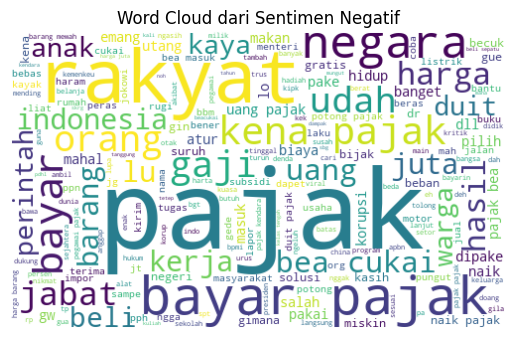

In [291]:
word_cloud(processed_data, 'Word Cloud dari Sentimen Negatif', 0)

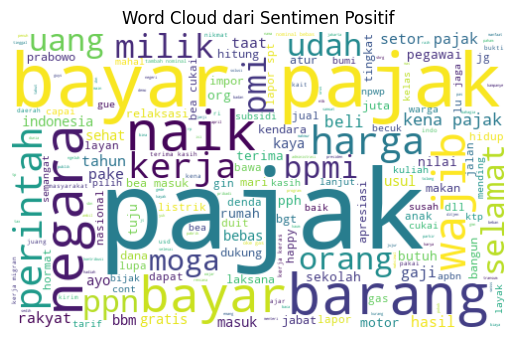

In [292]:
word_cloud(processed_data, 'Word Cloud dari Sentimen Positif', 1)

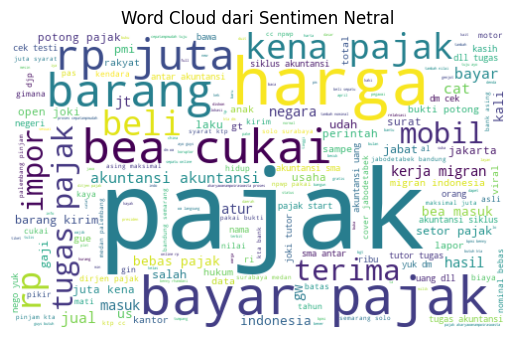

In [293]:
word_cloud(processed_data, 'Word Cloud dari Sentimen Netral', 2)

In [294]:
temp = processed_data.groupby('label').count()['tweet'].reset_index().sort_values(by='tweet',ascending=False)
temp.style.background_gradient(cmap='inferno_r')

,label,tweet
0,0,653
2,2,357
1,1,167


In [295]:
fig = go.Figure(go.Funnelarea(
    text = 
    temp.label,
    values = temp.tweet,
    title = {"position": "top center", "text": "Funnel-Chart dari Distribusi target"}
    ))

fig.show()

# Random Forest

### Split the data

In [296]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, processed_data['label'], test_size=0.2, random_state=42, stratify=processed_data['label'])
X_train.shape, X_test.shape

((941, 18599), (236, 18599))

### SMOTE for Imbalanced Classification

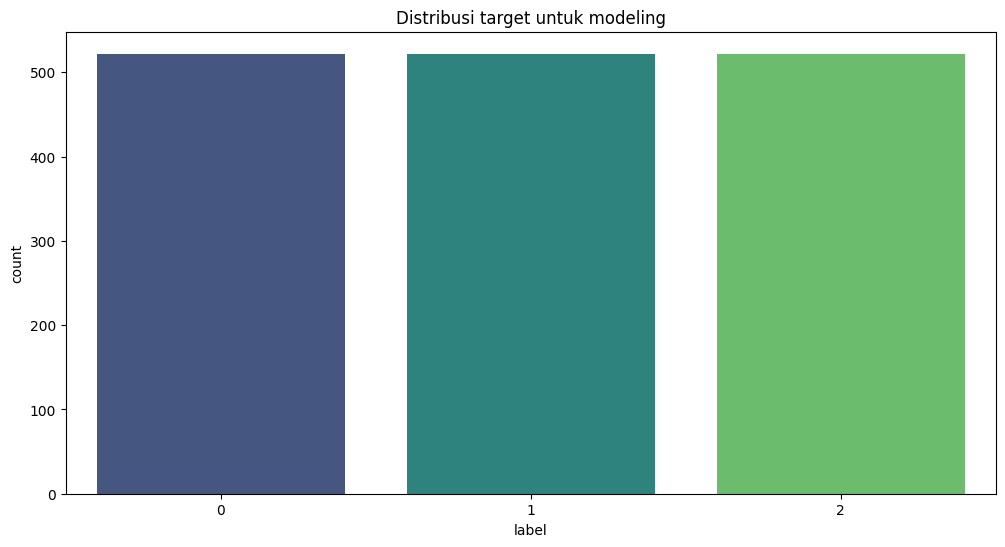

In [297]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

plt.figure(figsize=(12, 6))
sns.countplot(x=y_train, palette='viridis')
plt.title('Distribusi target untuk modeling')
plt.show()

### Implementing Machine Learning Models

In [298]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

In [299]:
rf_param_grid = {'n_estimators': [50, 100, 200],
                 'max_depth': [None, 10, 20, 30],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4],
                 'max_features': ['sqrt', 'log2']}

In [300]:
rf = RandomForestClassifier(random_state=42)
cv = StratifiedKFold(n_splits=5) 
rf_random_search = RandomizedSearchCV(estimator=rf, param_distributions=rf_param_grid, 
                                      n_iter=20, cv=cv, scoring='accuracy', random_state=42)
rf_random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(random_state=42), n_iter=20,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='accuracy')

In [301]:
print("\nBest Parameters for Random Forest:", rf_random_search.best_params_)


Best Parameters for Random Forest: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}


In [304]:
from sklearn.metrics import classification_report

y_pred_rf = rf_random_search.best_estimator_.predict(X_test)

print("\n\nClassification Report for Random Forest (Tuned):")
print(classification_report(y_test, y_pred_rf))



Classification Report for Random Forest (Tuned):
              precision    recall  f1-score   support

           0       0.74      0.63      0.68       131
           1       0.67      0.06      0.11        33
           2       0.49      0.82      0.61        72

    accuracy                           0.61       236
   macro avg       0.63      0.50      0.47       236
weighted avg       0.65      0.61      0.58       236

